# Plotting Data

In [1]:
import json

import intelligent_plant.session_manager as session_manager
import intelligent_plant.utility as utility

# Remeber to enable the device code flow in the app store app registration

#load the json config file with the app information
with open('config.json') as json_config_file:
    config = json.load(json_config_file)

    app_id = config['app']['id']
    app_secret = config['app']['secret']
    base_url = config['app_store']['base_url']


app_store = session_manager.load_session_or_login(app_id, app_secret, scopes=['DataRead'], base_url=base_url)

data_core = app_store.get_data_core_client()

Look up the fully qualified names of authorised data sources.
Check that 'Oil Co Demo' appears in this list for you.

In [2]:
list(map(lambda x: x['Name']['QualifiedName'], data_core.get_data_sources()))

['FCBB05262EADC0B147746EE6DFB2B3EA5C272C33C2C5E3FE8F473D85529461CA.Alarm Analysis Demo',
 'FCBB05262EADC0B147746EE6DFB2B3EA5C272C33C2C5E3FE8F473D85529461CA.Oil Co Demo']

We'll use Oil Co Demo as an example

In [3]:
dsn = 'FCBB05262EADC0B147746EE6DFB2B3EA5C272C33C2C5E3FE8F473D85529461CA.Oil Co Demo'

Get the 1st page of the tag list for the data source

In [4]:
tags = data_core.get_tags(dsn)

tag_names = list(map(lambda x: x["Id"], tags))

Show the tag list

In [5]:
tag_names

['AT-100143.IND_EU',
 'FT-100127-A.PV_IND',
 'FT-100127-B.IND_EU',
 'FT-100132-1',
 'LIC001',
 'LIC001_OP',
 'LIC001_PV',
 'LIC001_SP',
 'LIC002',
 'LIC002_OP',
 'LIC002_PV',
 'LIC002_SP',
 'LIC003',
 'LIC003_OP',
 'LIC003_PV',
 'LIC003_SP',
 'LIC004',
 'LIC004_OP',
 'LIC004_PV',
 'LIC004_SP']

Make a request for plot data for the 1st tag in the list

In [6]:
data = data_core.get_plot_data({dsn: tag_names}, "*-30d", "*", 30)

Import the intelligent plant utility and matplotlib

The IP utility esily transforms data returned by the data core API into a pandas data frame

Matplotlib is used to make plots

In [7]:
import intelligent_plant.utility as utility
import matplotlib.pyplot as plt

Use the IP utility to transform the response object into a data frame

In [8]:
data_frame = utility.query_result_to_data_frame(data, force_numeric=True).ffill()

In [9]:
data_frame

,FT-100127-B.IND_EU,FT-100132-1,LIC001_PV,LIC001_SP,LIC003,LIC004_OP,LIC002,LIC001,AT-100143.IND_EU,FT-100127-A.PV_IND,LIC001_OP,LIC002_PV,LIC004,LIC004_PV,LIC004_SP,LIC002_SP,LIC003_PV,LIC003_SP,LIC002_OP,LIC003_OP
2025-01-11 14:31:13.675919100+00:00,710.211022,701.629678,83.036488,83.0,50.0,40.983630,50.0,50.0,-25.0,701.411758,82.938324,61.306656,50.0,40.909480,41.0,62.0,66.152380,66.0,58.998023,66.040595
2025-01-11 14:40:00+00:00,709.629218,701.050574,83.036488,83.0,50.0,40.979656,50.0,50.0,-25.0,700.948166,82.941530,61.340160,50.0,40.909584,41.0,62.0,66.145233,66.0,58.936689,66.067550
2025-01-11 17:30:00+00:00,709.629218,701.050574,83.036488,83.0,50.0,40.979656,50.0,50.0,-25.0,700.948166,82.941530,66.195203,50.0,40.909584,41.0,62.0,66.145233,66.0,58.936689,66.067550
2025-01-11 19:10:00+00:00,709.629218,701.050574,83.036488,83.0,50.0,40.880884,50.0,50.0,-25.0,700.948166,82.941530,66.195203,50.0,40.909584,41.0,62.0,66.145233,66.0,58.936689,66.067550
2025-01-11 20:10:00+00:00,711.832757,702.927597,83.036488,83.0,50.0,40.880884,50.0,50.0,-25.0,703.065550,82.941530,66.195203,50.0,40.909584,41.0,62.0,66.145233,66.0,58.936689,66.067550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 10:00:00+00:00,703.583911,694.714564,82.934221,83.0,50.0,46.576135,50.0,50.0,-25.0,695.325549,90.140531,66.033076,50.0,45.227692,57.0,62.0,42.687781,66.0,66.396385,66.150923
2025-02-10 13:40:00+00:00,703.583911,694.714564,82.934221,83.0,50.0,46.576135,50.0,50.0,-25.0,695.325549,82.923256,66.033076,50.0,45.227692,57.0,62.0,42.687781,66.0,66.396385,66.150923
2025-02-10 14:00:00+00:00,703.583911,694.714564,82.934221,83.0,50.0,46.576135,50.0,50.0,-25.0,695.325549,82.923256,66.033076,50.0,45.227692,57.0,62.0,66.165830,66.0,66.396385,66.150923
2025-02-10 14:30:00+00:00,709.629218,701.050574,83.036488,83.0,50.0,40.979656,50.0,50.0,-25.0,700.948166,82.941530,61.340160,50.0,40.909584,41.0,62.0,66.145233,66.0,58.936689,66.067550


Plot the first 5 tags in the data frame data frame

<Axes: >

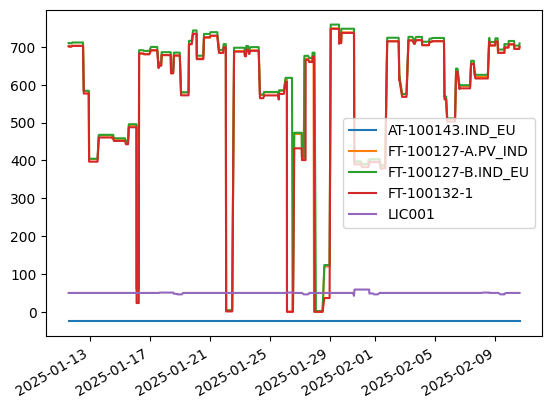

In [10]:
data_frame[tag_names[:5]].plot()